
# Build your own movie recommender!  

Today, you'll build a **simple movie recommender system** using **TF-IDF (Term Frequency-Inverse Document Frequency) and Cosine Similarity**.  

### Your task  
- You'll be given a dataset of movies and their descriptions.  
- Using **TF-IDF**, you'll transform these descriptions into numerical vectors.  
- Then, using **Cosine Similarity**, you'll recommend movies based on user input.  



In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Display plots in the notebook
import matplotlib.pyplot as plt
import seaborn as sns


Libraries loaded successfully! 🚀


In [2]:

# Load the movie dataset

# Sample movie dataset (title + description)
movies = pd.DataFrame({
    'title': [
        'The Matrix', 'Inception', 'Interstellar', 'The Dark Knight', 'Avatar',
        'Titanic', 'The Avengers', 'Joker', 'The Lion King', 'Frozen'
    ],
    'description': [
        'A computer hacker learns about the true nature of reality and his role in the war against its controllers.',
        'A thief who enters the dreams of others to steal secrets is given a task to plant an idea into a target’s subconscious.',
        'A team of explorers travel through a wormhole in space in an attempt to save humanity.',
        'A billionaire fights crime in Gotham City, facing his greatest enemy, the Joker.',
        'A paraplegic Marine is sent to a distant planet and becomes involved in a conflict between humans and an alien species.',
        'A romance blossoms aboard the doomed Titanic.',
        'Superheroes join forces to save Earth from an alien invasion.',
        'A failed comedian becomes a criminal mastermind in Gotham.',
        'A young lion prince flees his kingdom only to return later to reclaim his throne.',
        'A princess with ice powers must save her kingdom from eternal winter.'
    ]
})

# Show dataset
movies.head()

,title,description
0,The Matrix,A computer hacker learns about the true nature...
1,Inception,A thief who enters the dreams of others to ste...
2,Interstellar,A team of explorers travel through a wormhole ...
3,The Dark Knight,"A billionaire fights crime in Gotham City, fac..."
4,Avatar,A paraplegic Marine is sent to a distant plane...


In [6]:

# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Transform movie descriptions into TF-IDF feature vectors
tfidf_matrix = tfidf_vectorizer.fit_transform(movies['description'])

# Show shape of the matrix
print(f"TF-IDF matrix shape: {tfidf_matrix.shape}")


TF-IDF matrix shape: (10, 75)


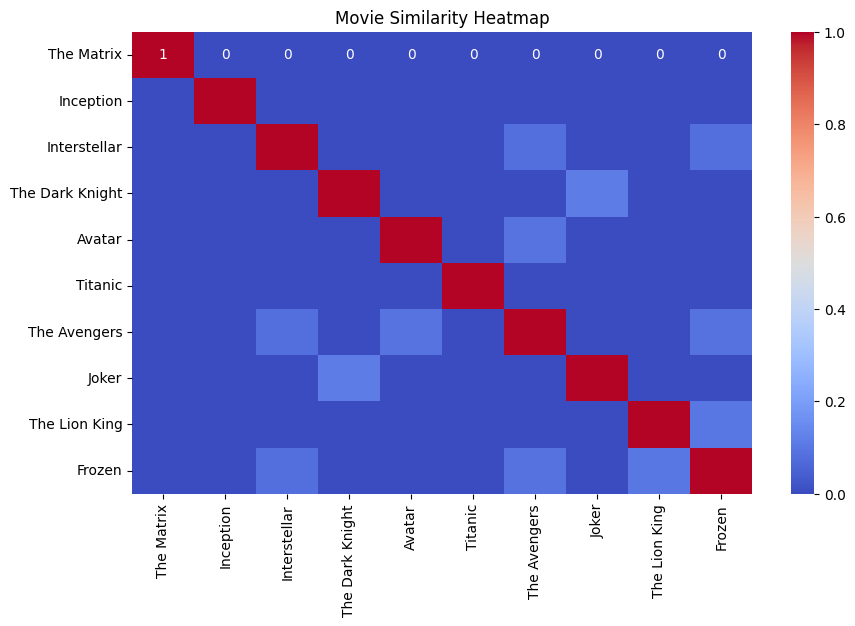

In [7]:

# 🔍 Compute Cosine Similarity Between Movies

# Compute the cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Display as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cosine_sim, annot=True, cmap="coolwarm", xticklabels=movies['title'], yticklabels=movies['title'])
plt.title("Movie Similarity Heatmap")
plt.show()


In [8]:

# Movie Recommendation Function

def recommend_movie(movie_title, num_recommendations=3):
    # Check if movie exists in dataset
    if movie_title not in movies['title'].values:
        return "Movie not found! Please try another title."
    
    # Get index of the movie
    movie_index = movies[movies['title'] == movie_title].index[0]
    
    # Get similarity scores for all movies
    similarity_scores = list(enumerate(cosine_sim[movie_index]))
    
    # Sort movies based on similarity scores
    sorted_movies = sorted(similarity_scores, key=lambda x: x[1], reverse=True)[1:num_recommendations+1]
    
    # Get recommended movie titles
    recommendations = [movies.iloc[i[0]]['title'] for i in sorted_movies]
    
    return recommendations

# Try recommending movies for "Inception"
recommend_movie("Inception")


['The Matrix', 'Interstellar', 'The Dark Knight']

In [ ]:

# Interactive Movie Recommendation

# Get user input
user_movie = input("Enter a movie title: ")

# Show recommendations
print("Recommended movies:", recommend_movie(user_movie))
